### 1. Libraries

All needed libraries:
1.   Pandas For Data Manipulation
2.   Seaborn For Data Visualization
3.   Matplotlib For Customizing Visualizations



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###2. Read Data

Reading Data

In [2]:
df = pd.read_csv('/content/product_sales.csv')
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


###3. Explore Data

Describe function to see statistical information about the data.

In [3]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


info function to check:


1.   Number of columns and rows.
2.   Number or null values for each column.
3.   Data type for each column.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


isnull().sum() function to check the total null values for each column

In [5]:
df.isnull().sum()

,0
week,0
sales_method,0
customer_id,0
nb_sold,0
revenue,1074
years_as_customer,0
nb_site_visits,0
state,0


nunique function to check the number of unique values for each column.

In [6]:
df.nunique()

,0
week,6
sales_method,5
customer_id,15000
nb_sold,10
revenue,6743
years_as_customer,42
nb_site_visits,27
state,50


Value counts function to see each value in a column and it's frequency within the data.

In [7]:
cols = ['week' , 'sales_method', 'nb_sold', 'years_as_customer', 'nb_site_visits', 'state']
for column in cols:
  if column in df.columns:
    print(df[column].value_counts().sort_index())
    print("-" * 35)

week
1    3721
2    2491
3    2411
4    2575
5    2574
6    1228
Name: count, dtype: int64
-----------------------------------
sales_method
Call            4962
Email           7456
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64
-----------------------------------
nb_sold
7      698
8     1941
9     3535
10    3677
11    2439
12    1088
13     939
14      97
15     555
16      31
Name: count, dtype: int64
-----------------------------------
years_as_customer
0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
47       1
63       1
Name: count, dtype: int64
-------

Correlation function to see the correlation between features

*   A Correlation between week and number of products sold equals to 80%
*   A Correlation between revenue and number of products sold equalts to 69%




In [8]:
df[['week' , 'nb_sold', 'revenue', 'years_as_customer' , 'nb_site_visits']].corr()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
week,1.000000,0.809887,0.356179,-0.082334,0.419038
nb_sold,0.809887,1.000000,0.696165,-0.099117,0.490718
revenue,0.356179,0.696165,1.000000,-0.064696,0.323089
years_as_customer,-0.082334,-0.099117,-0.064696,1.000000,-0.048860
nb_site_visits,0.419038,0.490718,0.323089,-0.048860,1.000000


###4. Preprocessing And Analysis

####Sales Method

Unique function to print the unique values in a column.

After exploring, there was inconsistencies in the column. for example, Email value and email value, both of them are the same but was inconsistent in entry phase where onne of them written with uppercase for the first letter and the other is not.

In addition, (Email + Call) and (em + call), it is a must to match similar values to each other.

In [9]:
print("Before\n" , df['sales_method'].unique())
df['sales_method'] = df['sales_method'].replace({'email' : 'Email', 'em + call' : 'Email + Call'})
print("After\n" , df['sales_method'].unique())

Before
 ['Email' 'Email + Call' 'Call' 'em + call' 'email']
After
 ['Email' 'Email + Call' 'Call']


#### Years As Customer

Box plot to detect outliers.

It is valid to remove outliers but sometimes it is not, it depends on the case that we are working with. In this case, the number of the products sold, revenue and site visits are not outliers because they are real data points that was made by customers. However, the box plot of years as customer column detected customers more than 40 years. It is a mistake in data entry because the company was founded in 1984 and we are in 2024. the maximum reach as customers should be 40 years only.



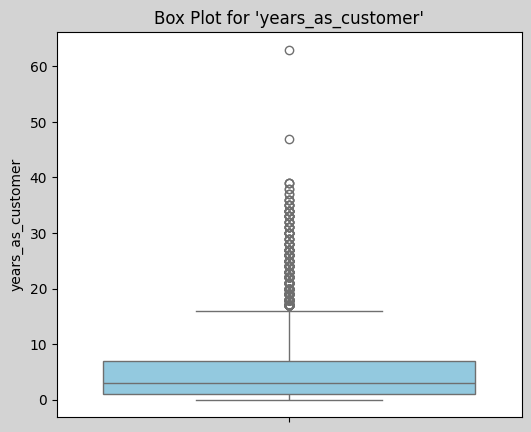

In [10]:
plt.figure(figsize=(6, 5))
plt.gcf().set_facecolor('lightgray')
sns.boxplot(y=df['years_as_customer'], color='skyblue')
plt.title("Box Plot for 'years_as_customer'")
plt.show()

Displaying the outliers instances.

In [11]:
outliers_yac = df[df['years_as_customer'] > 40]
outliers_yac

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


Creating a filter with conditions that matches the outliers instances attributes to display the instances in common.

In [12]:
filter_yac = df[
    (df['nb_sold'] == 10) &
    (df['revenue'] >= 50) & (df['revenue'] < 98) &
    (df['nb_site_visits'] >= 24) & (df['nb_site_visits'] <=27) &
    (df['state'] == 'California')]

filter_yac = filter_yac[(filter_yac['sales_method'] == 'Call') | (filter_yac['sales_method'] == 'Email')]
filter_yac.reset_index(drop=True, inplace=True)
filter_yac

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,1,Email,a46ed8d0-f927-4fa8-a1db-19108a236abe,10,95.02,4,24,California
1,4,Call,c11f3e76-4f1a-4184-994c-4a43efd8f76f,10,51.35,17,27,California
2,5,Call,ca31aa7a-d2b2-4abe-b0f2-e97f39f8a80b,10,51.93,3,24,California
3,4,Call,edca7e82-7163-4f33-a797-cd2871146410,10,52.31,2,26,California
4,5,Call,ad0788ad-1e68-4be6-89af-e0756ef44808,10,51.75,4,25,California
...,...,...,...,...,...,...,...,...
92,4,Call,579396d6-4947-4844-b3c0-c8f7bb80104b,10,51.74,9,25,California
93,1,Email,a8eda38a-44d0-45f1-8687-374ec506a73a,10,96.13,9,26,California
94,5,Call,fd3f8548-c76d-40c0-952b-28ba413a6620,10,52.17,6,27,California
95,4,Call,b3082172-b819-478a-9664-b56089822f78,10,50.32,5,26,California


<Axes: xlabel='years_as_customer', ylabel='count'>

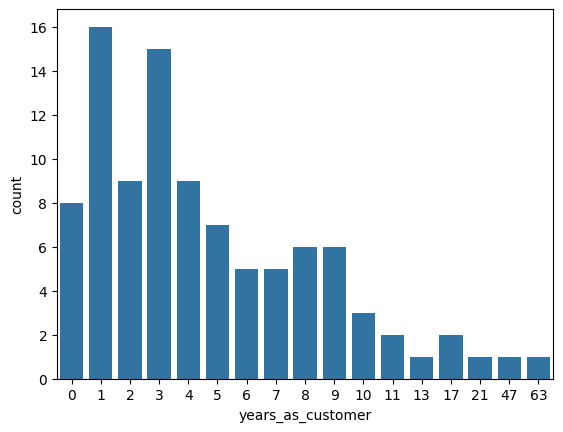

In [13]:
sns.countplot(x = 'years_as_customer' , data = filter_yac)

Unfortunately, I could not detect a clear and logic relationship between the similar attributes that the outliers instances share with other instances. Therefore, I have decided to delete these two rows since it is only 2 out of 15000

In [14]:
df = df[df['years_as_customer'] <= 40]

Creating a new feature that categorize customers into Long time customers (more than 10 years), medium time customers (between 5 to 10), short time customers (to 5 years)

In [15]:
bins = [0, 5, 10, float('inf')]
labels = ['Short Time', 'Medium Time', 'Long Time']
df['Loyalty'] = pd.cut(df['years_as_customer'], bins=bins, labels=labels, right=False)

<ipython-input-15-4fa332880889>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loyalty'] = pd.cut(df['years_as_customer'], bins=bins, labels=labels, right=False)


#### Week

For visualization purposes, I created a new feature that has two values, First (for values that has week equals to [1,2,3]). Last (for values that has week equalt to [4,5,6])

In [16]:
df['categoryTime'] = pd.cut(df['week'], bins=[0, 3, 6], labels=['First', 'Last'], right=True)
df.head()

<ipython-input-16-d2f47e5911f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categoryTime'] = pd.cut(df['week'], bins=[0, 3, 6], labels=['First', 'Last'], right=True)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,Loyalty,categoryTime
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona,Short Time,First
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,Short Time,Last
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,Medium Time,Last
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana,Short Time,Last
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,Short Time,First


#### Revenue

Text(0.5, 0, 'Revenue')

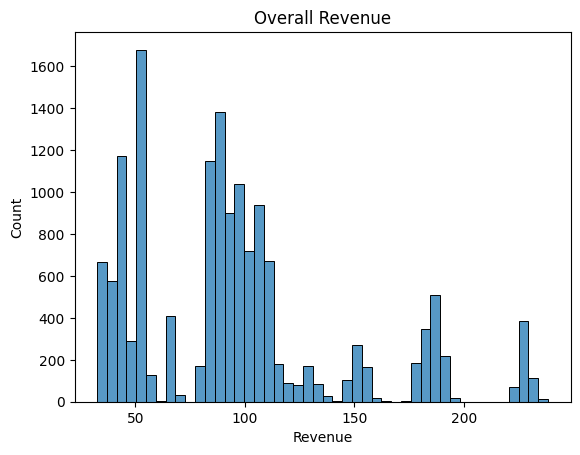

In [29]:
sns.histplot(x='revenue' , data =df)
plt.title("Overall Revenue")
plt.xlabel("Revenue")

<Axes: xlabel='revenue', ylabel='nb_sold'>

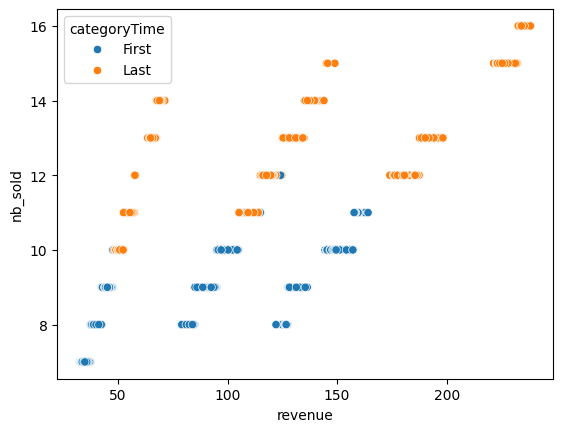

In [18]:
sns.scatterplot(x = 'revenue' , y= 'nb_sold', hue = 'categoryTime',data = df)

From this plot, there is a relationship between (Week of Purchase After Launching, Revenue and Number Of Products Sold).

Most likely, when there is more than 12 purchases for a product, it would be after launching the product for 3 weeks.

<Axes: xlabel='nb_sold', ylabel='revenue'>

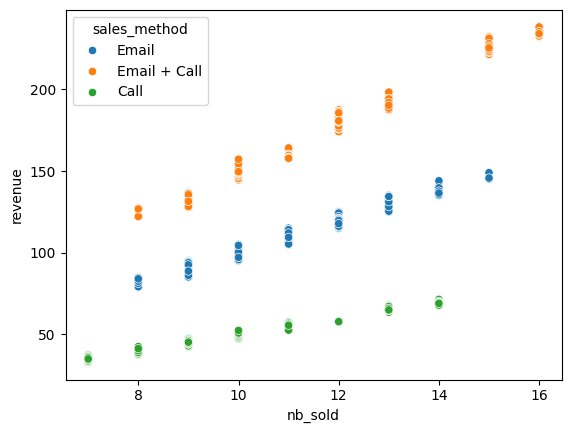

In [19]:
sns.scatterplot(x = 'nb_sold' , y= 'revenue', hue = 'sales_method',data = df)

<Axes: xlabel='week', ylabel='revenue'>

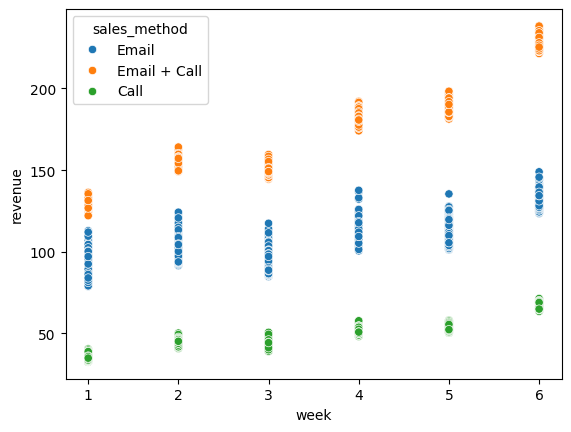

In [20]:
sns.scatterplot(x = 'week' , y= 'revenue', hue = 'sales_method',data = df)

In [21]:
call = df[df['sales_method'] == 'Call']
email = df[df['sales_method'] == 'Email']
both = df[df['sales_method'] == 'Email + Call']


print("Minimum Revenue For Call:" , call['revenue'].min())
print("Maximum Revenue For Call:" , call['revenue'].max())
print("Mean Of Revenue For Call Method:" ,call['revenue'].mean())
print("-" * 55)

print("Minimum Revenue For Email:" , email['revenue'].min())
print("Maximum Revenue For Email:" , email['revenue'].max())
print("Mean Of Revenue For Email Method:" ,email['revenue'].mean())

print("-" * 55)

print("Maximum Revenue For Email + Call:" , both['revenue'].min())
print("Maximum Revenue For Email + Call:" , both['revenue'].max())
print("Mean Of Revenue For Email + Call Methods:" ,both['revenue'].mean())

Minimum Revenue For Call: 32.54
Maximum Revenue For Call: 71.36
Mean Of Revenue For Call Method: 47.59686610878661
-------------------------------------------------------
Minimum Revenue For Email: 78.83
Maximum Revenue For Email: 148.97
Mean Of Revenue For Email Method: 97.1276708568126
-------------------------------------------------------
Maximum Revenue For Email + Call: 122.11
Maximum Revenue For Email + Call: 238.32
Mean Of Revenue For Email + Call Methods: 183.651232568601


From this plot, there is a relationship between (Sales method, Revenue and Number Of Products Sold).

As shown, there is a pattern that:

*   When the sale method is by Call, the revenue between 32 to 72
*   When the sale method is by Email, the revenue between 78 to 149
*   When the sale method is by Call And Email, the revenue between 122 to 239



In [22]:
def fill_nan_based_on_conditions(df):
    df['revenue'] = df.groupby(['sales_method', 'week', 'nb_sold'])['revenue'].transform(
        lambda x: x.fillna(x.mean())
    )
    return df

df = fill_nan_based_on_conditions(df)

<ipython-input-22-523c6689173c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = df.groupby(['sales_method', 'week', 'nb_sold'])['revenue'].transform(


#### Further Analysis

Text(0.5, 0, 'Sales Method')

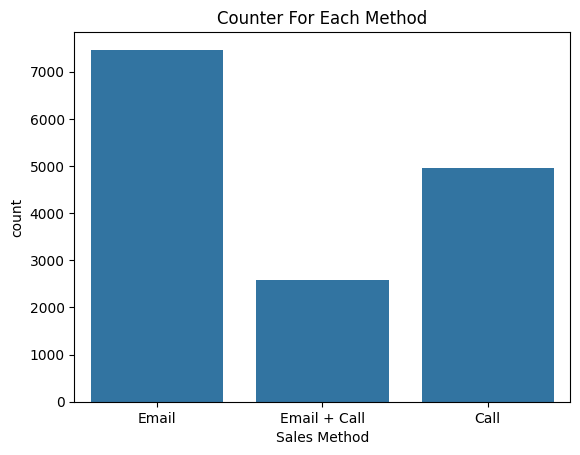

In [28]:
sns.countplot(x = 'sales_method', data = df)
plt.title("Counter For Each Method")
plt.xlabel("Sales Method")

<ipython-input-31-ea7ba2535637>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'week', y = 'revenue', hue = 'sales_method',data = grdf, ci = None)


Text(0.5, 0, 'Week')

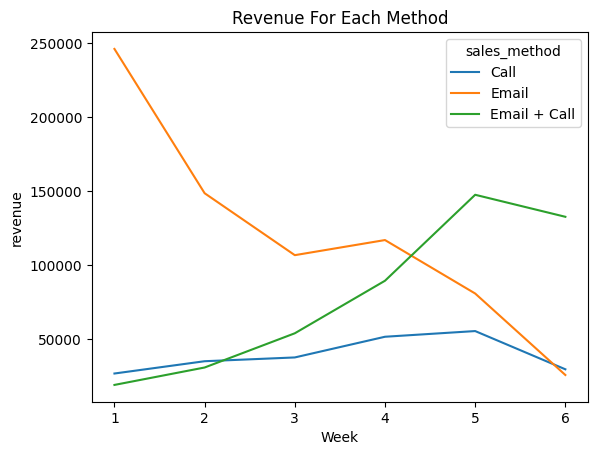

In [31]:
grdf = df.groupby(['week', 'sales_method'], as_index=False)['revenue'].sum()

sns.lineplot(x = 'week', y = 'revenue', hue = 'sales_method',data = grdf, ci = None)
plt.title("Revenue For Each Method")
plt.xlabel("Week")

<ipython-input-25-c1a2e7625c32>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfloyal = df.groupby(['Loyalty', 'sales_method'], as_index=False)['revenue'].sum()


<Axes: xlabel='Loyalty', ylabel='revenue'>

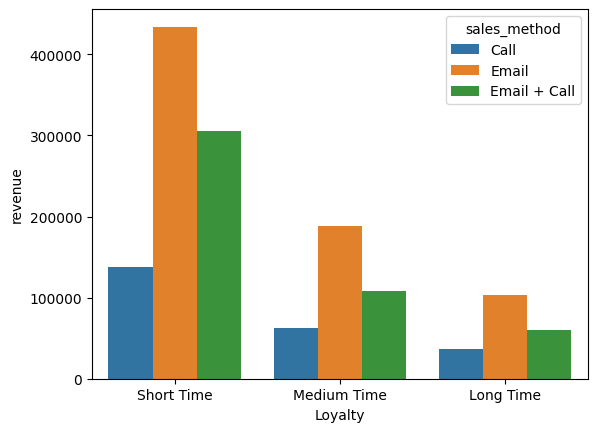

In [25]:
dfloyal = df.groupby(['Loyalty', 'sales_method'], as_index=False)['revenue'].sum()

sns.barplot(x = 'Loyalty', y = 'revenue', hue = 'sales_method',data = dfloyal)

### Business Metric

In [49]:
revenue_metric = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
weeks = [1, 2, 3, 4, 5, 6]
filterweek_revenue = revenue_metric[revenue_metric['week'].isin(weeks)].round()
filterweek_revenue['revenue'] = filterweek_revenue['revenue'].astype(int)
filterweek_revenue

,week,sales_method,revenue
0,1,Call,26794
1,1,Email,246262
2,1,Email + Call,19081
3,2,Call,35104
4,2,Email,148693
5,2,Email + Call,30861
6,3,Call,37661
7,3,Email,106815
8,3,Email + Call,53998
9,4,Call,51651
